In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch.utils.data import DataLoader,Dataset
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
use_cuda = torch.cuda.is_available()

device = torch.device("cuda:0" if use_cuda else "cpu")

In [3]:
print(torch.version.cuda)

10.0.130


In [4]:
#Preparing the dataset

data_path = 'data/dataset/'

train_dataset = torchvision.datasets.ImageFolder( root = data_path, transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((32,32)),
    transforms.ToTensor(),
])) 

len(train_dataset)

26724

In [5]:
train_loader = DataLoader( train_dataset, batch_size = 64, num_workers = 0, shuffle = True)

In [6]:
sample = next(iter(train_dataset))

In [7]:
image , label = sample

label:  0


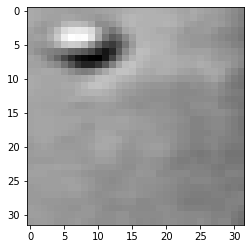

In [8]:
plt.imshow(image.squeeze(),cmap="gray")
print('label: ',label)

In [9]:
batch = next(iter(train_loader))

In [10]:
images , labels = batch

In [11]:
torch.unique(labels)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18,
        21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 36])

labels :  tensor([ 2, 14,  7, 16, 13, 13,  7,  9,  5, 28, 12, 17, 18,  8,  0,  7,  5, 26,
        25, 21,  3,  8, 33, 25, 13, 23, 27,  1, 24, 28, 32,  3, 36,  2, 33, 32,
         6, 27, 10,  9, 31,  0, 32, 12, 23, 16, 32, 27, 14, 28, 10, 21, 15, 32,
        27,  3,  4, 33, 30,  8,  3, 14, 12,  0])


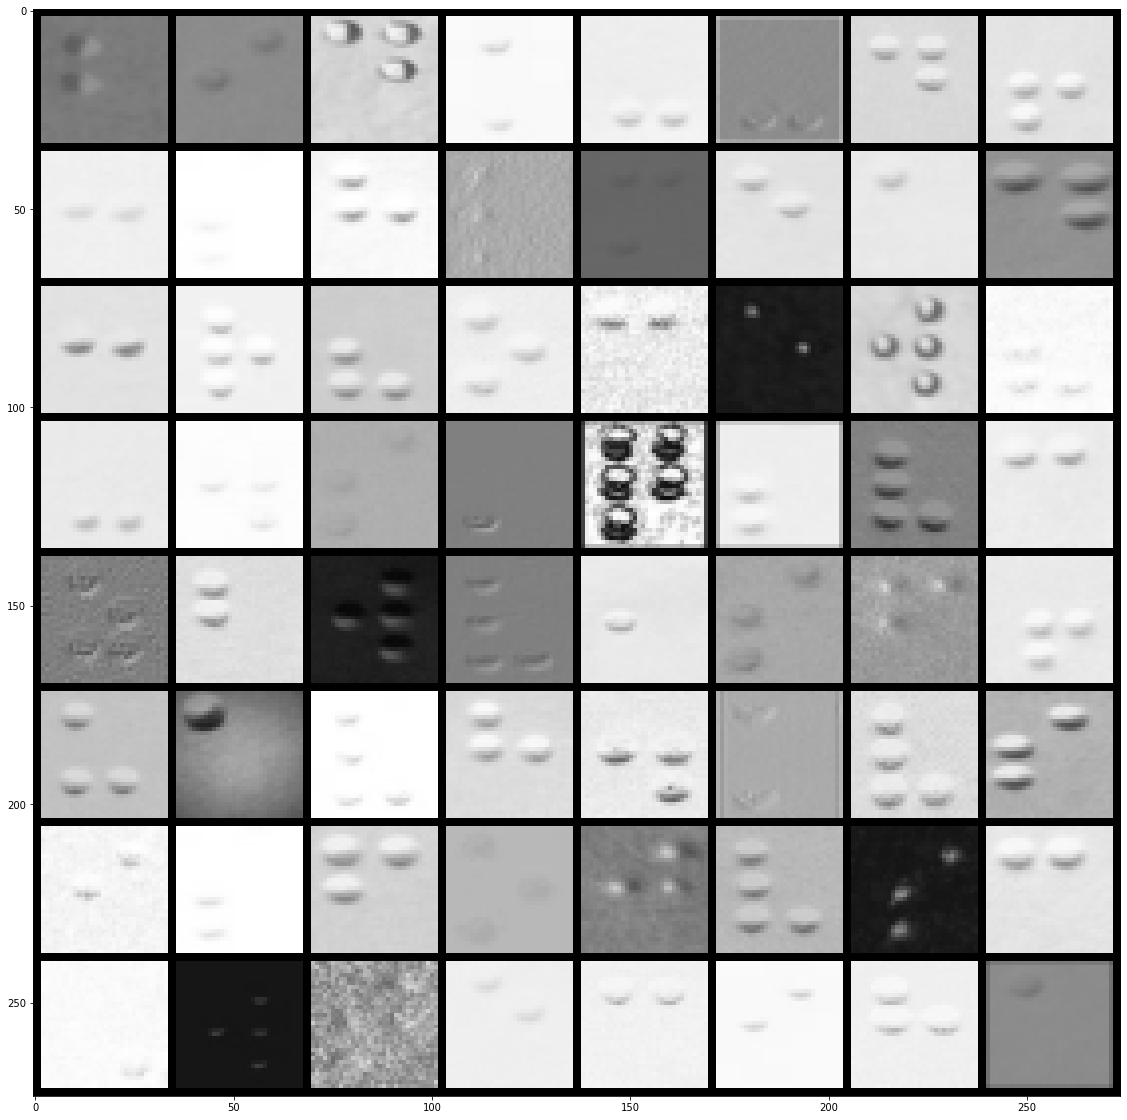

In [12]:
grid = torchvision.utils.make_grid(images,nrow=8)

plt.figure(figsize = (20,20))
plt.imshow(np.transpose(grid,(1,2,0)))

print('labels : ',labels)

In [13]:
#Defining the neural network

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        
        # defining convolutional layers
        
        self.conv1 = nn.Conv2d(in_channels = 1,out_channels = 6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels = 6,out_channels = 16,kernel_size = 5)
        self.conv3 = nn.Conv2d(in_channels = 16,out_channels = 120,kernel_size = 5)
        
        # defining feed forward layers
        
        self.fc1 = nn.Linear(in_features = 120,out_features = 84)
        
        # output layer
        
        self.out = nn.Linear(in_features = 84,out_features = 37)
    
    def forward(self,t):
        
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size = 2,stride = 2)
        
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t,kernel_size = 2,stride = 2)
        
        t = self.conv3(t)
        t = F.relu(t)
        
        t = t.reshape(-1,120)
        t = self.fc1(t)
        t = F.relu(t)
        
        t = self.out(t)
        
        return t

In [30]:
network = CNN()

In [32]:
optimizer = optim.Adam(network.parameters(),lr=0.01)


for epoch in range(50):
    total_loss = 0
    total_correct = 0
    
    for batch in train_loader:
        images , labels = batch
        
        pred = network(images)
        loss = F.cross_entropy(pred,labels)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += pred.argmax(dim=1).eq(labels).sum().item()
        
    print("epoch : ", epoch , "total_correct : ", total_correct , "total_loss : ",total_loss)

epoch :  0 total_correct :  957 total_loss :  1495.1655542850494
epoch :  1 total_correct :  978 total_loss :  1495.0283377170563
epoch :  2 total_correct :  942 total_loss :  1495.1154370307922
epoch :  3 total_correct :  972 total_loss :  1495.031644821167
epoch :  4 total_correct :  975 total_loss :  1495.053034543991
epoch :  5 total_correct :  952 total_loss :  1494.997014284134
epoch :  6 total_correct :  1014 total_loss :  1495.0340750217438
epoch :  7 total_correct :  964 total_loss :  1495.0196673870087
epoch :  8 total_correct :  916 total_loss :  1494.9922995567322
epoch :  9 total_correct :  959 total_loss :  1495.0903742313385
epoch :  10 total_correct :  946 total_loss :  1495.1470580101013
epoch :  11 total_correct :  943 total_loss :  1495.0532965660095
epoch :  12 total_correct :  959 total_loss :  1495.1931009292603
epoch :  13 total_correct :  959 total_loss :  1495.180832862854
epoch :  14 total_correct :  937 total_loss :  1495.0912396907806
epoch :  15 total_corre

In [35]:
test_path = "data/test/"

test_set = torchvision.datasets.ImageFolder(root = data_path, transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((32,32)),
    transforms.ToTensor(),
]))

In [36]:
test_loader = torch.utils.data.DataLoader(test_set,batch_size = 64,shuffle=True)

In [37]:
batch = next(iter(test_loader))

labels :  tensor([12, 12, 11, 18, 17, 22,  6, 32, 27, 34,  2, 28, 15, 30, 19, 35, 35,  6,
        21,  6, 31, 30, 23,  1, 34, 32, 35, 35, 11,  1,  0, 22, 35, 33,  2,  9,
        16, 22,  5, 23,  9, 13, 25, 33, 24, 33, 11, 35, 32, 12, 34, 32, 12, 27,
        17, 21, 27,  2,  0,  5, 13, 34, 24, 25])
prediction :  tensor([24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
        24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
        24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
        24, 24, 24, 24, 24, 24, 24, 24, 24, 24])
prediction tally :  tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, Fa

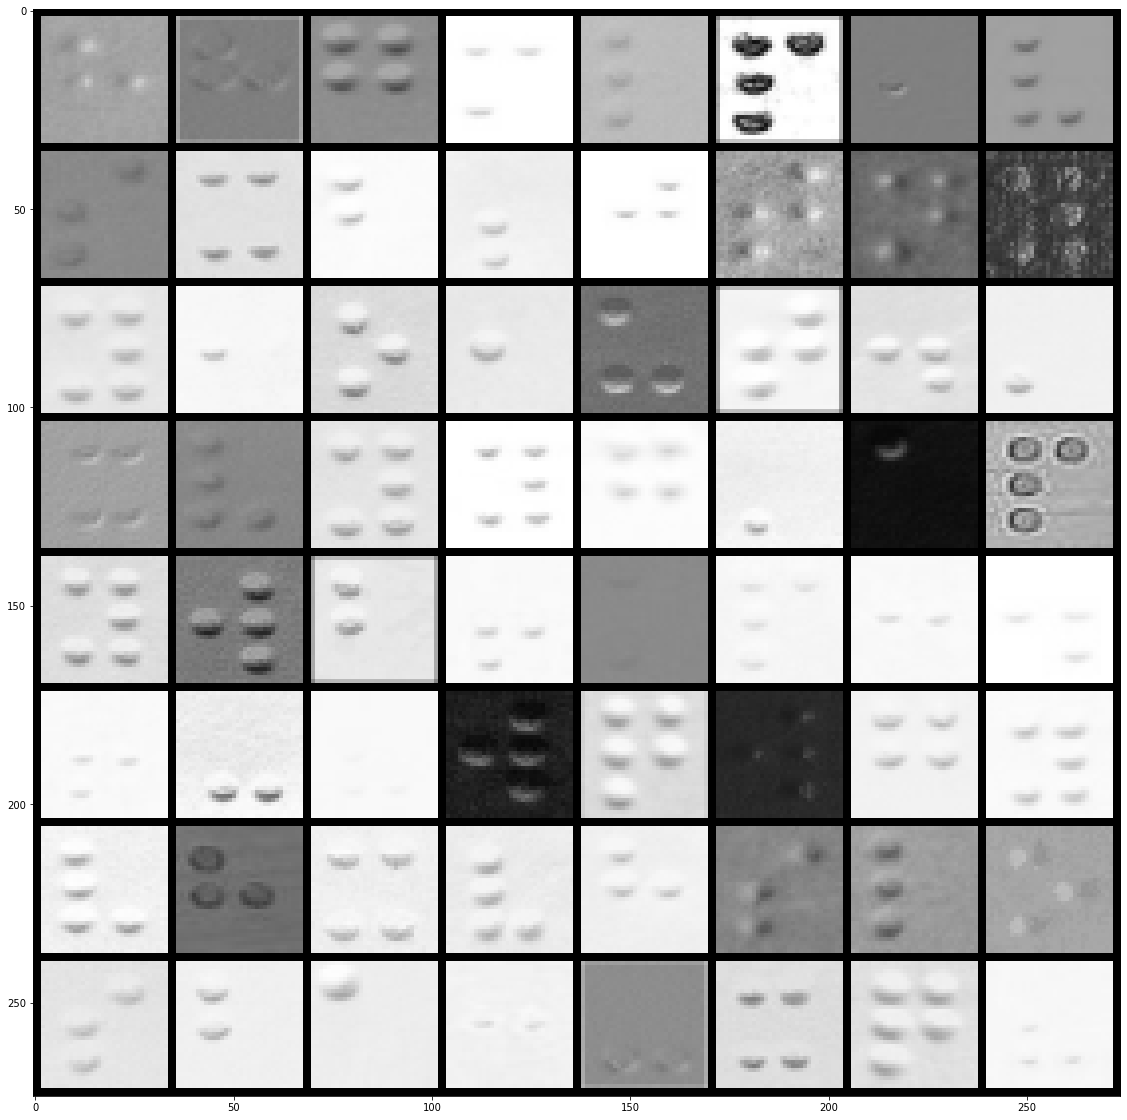

In [27]:
images , labels = batch

pred = network(images)

grid = torchvision.utils.make_grid(images,nrow=8)

plt.figure(figsize = (20,20))
plt.imshow(np.transpose(grid,(1,2,0)))

print('labels : ',labels)
print('prediction : ', pred.argmax(dim=1))
print('prediction tally : ',pred.argmax(dim=1).eq(labels))

print('Total correct predictions : ',pred.argmax(dim=1).eq(labels).sum().item())

In [ ]:
#saving the data parameters

torch.save(network.state_dict(),'Parameters.pt')

In [ ]:
#loading the data

network.load_state_dict(torch.load('Parameters.pt'))
network.eval()